# Functional Approximations by Trees and Neural Networks

Here we show how the function

$$
x \mapsto exp(4 x)
$$

can be easily approximated by a tree-based methods (Trees, Random Forest) and a neural network (2 Layered Neural Network)

## Functional Approximation by a Tree


[1] 1000    1

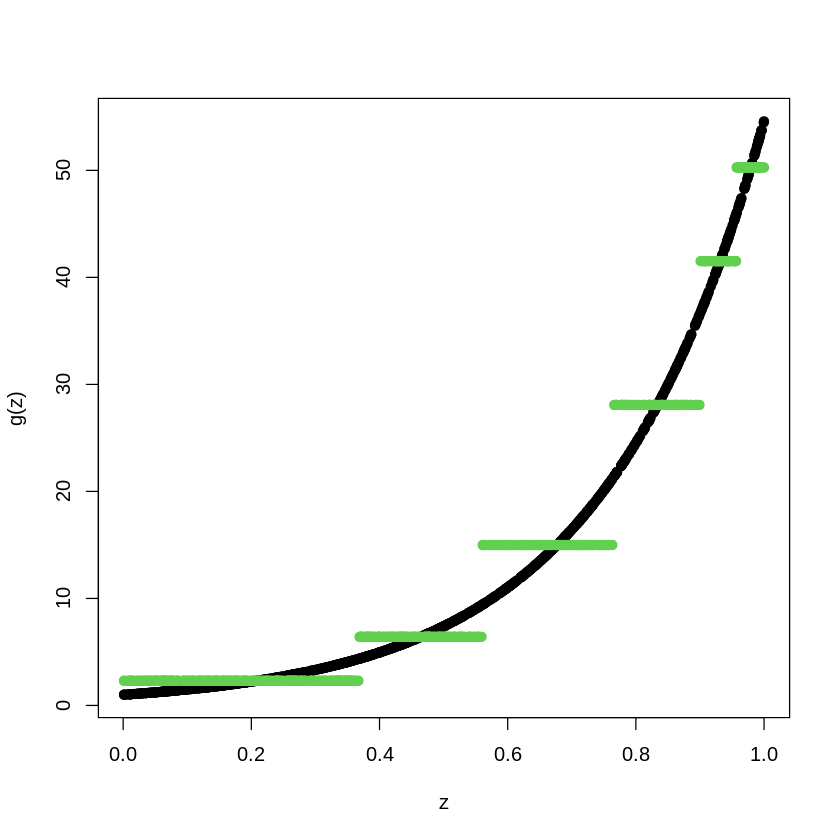

In [1]:
install.packages("librarian", quiet = T)
librarian::shelf(rpart, randomForest, keras, gbm, quiet = T)
set.seed(1)
X_train <- matrix(runif(1000),1000,1)
Y_train <- exp(4*X_train)  #Noiseless case  Y=g(X)
dim(X_train)

# library(rpart)

# shallow tree
TreeModel<- rpart(Y_train~X_train, cp=.01)  #cp is penalty level
pred.TM<- predict(TreeModel, newx=X_train)
plot(X_train, Y_train, type="p", pch=19, xlab="z", ylab="g(z)")
points(X_train, pred.TM, col=3, pch=19)

[1] 1000    1

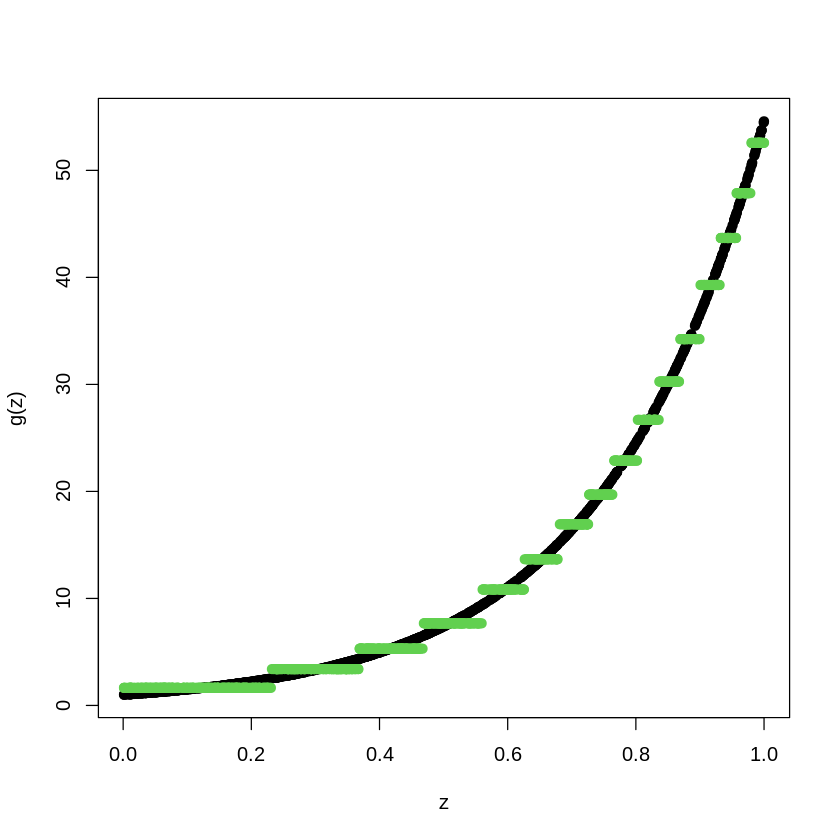

In [2]:
set.seed(1)
X_train <- matrix(runif(1000),1000,1)
Y_train <- exp(4*X_train)  #Noiseless case  Y=g(X)
dim(X_train)

# library(rpart)

TreeModel<- rpart(Y_train~X_train, cp=.0005)  #cp is penalty level
pred.TM<- predict(TreeModel, newx=X_train)
plot(X_train, Y_train, type="p", pch=19, xlab="z", ylab="g(z)")
points(X_train, pred.TM, col=3, pch=19)

## Functional Approximation by RF

Here we show how the function

$$
x \mapsto exp(4 x)
$$

can be easily approximated by a tree-based method (Random Forest) and a neural network (2 Layered Neural Network)

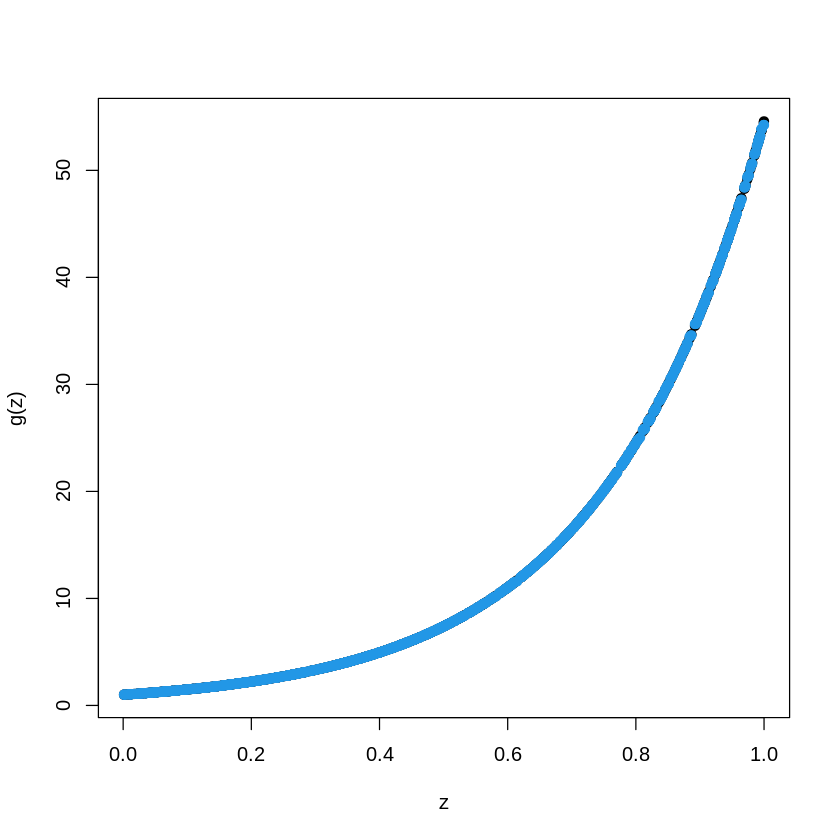

In [3]:
# library(randomForest)

RFmodel<- randomForest(Y_train~X_train)
pred.RF<- predict(RFmodel, newdata=X_train)
plot(X_train, Y_train, type="p", pch=19, xlab="z", ylab="g(z)")
points(X_train, pred.RF, col=4,  pch=19,)


## Boosted Trees

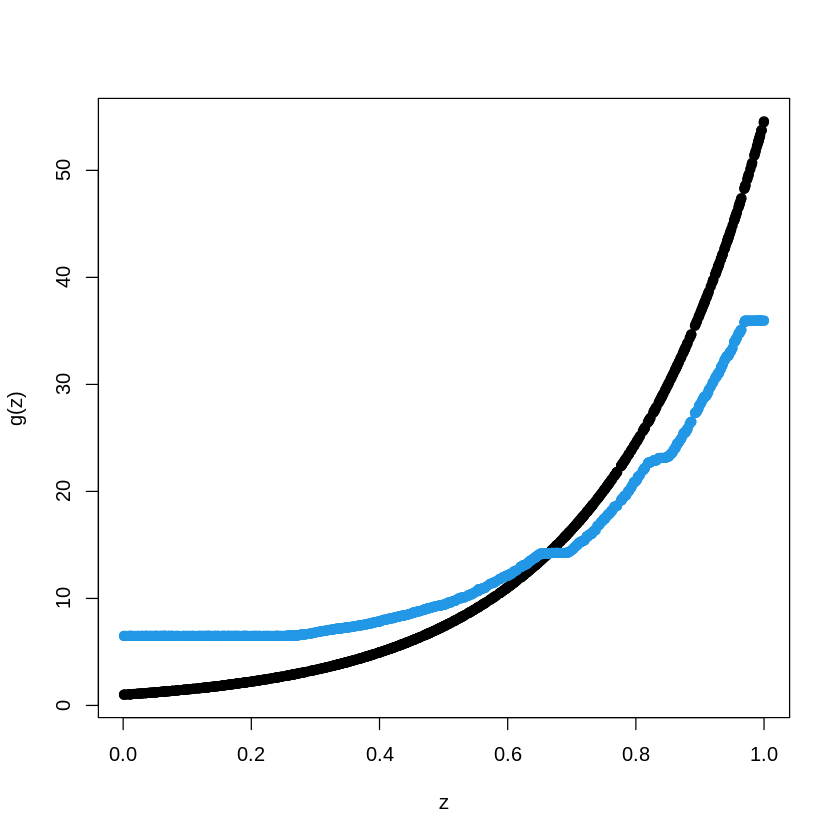

In [4]:
# library(gbm)

data_train = as.data.frame(cbind(X_train, Y_train))
BoostTreemodel<- gbm(Y_train~X_train, distribution= "gaussian",  n.trees=100, shrinkage=.01, interaction.depth
=4) 
 #shrinkage is "learning rate"
 # n.trees is the number of boosting steps 
pred.BT<- predict(BoostTreemodel, newdata=data_train, n.trees=100)
plot(X_train, Y_train, type="p", pch=19, xlab="z", ylab="g(z)")
points(X_train, pred.BT, col=4,  pch=19,)

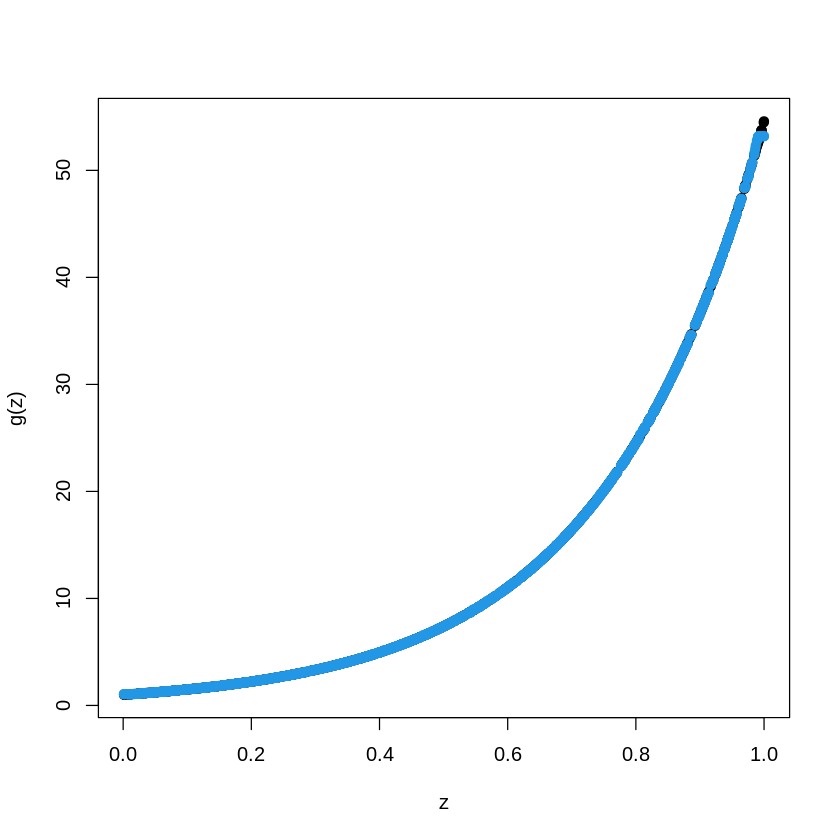

In [5]:
# library(gbm)

data_train = as.data.frame(cbind(X_train, Y_train))
BoostTreemodel<- gbm(Y_train~X_train, distribution= "gaussian",  n.trees=1000, shrinkage=.01, interaction.depth
=4) 
 # shrinkage is "learning rate"
 # n.trees is the number of boosting steps 
pred.BT<- predict(BoostTreemodel, newdata=data_train, n.trees=1000)
plot(X_train, Y_train, type="p", pch=19, xlab="z", ylab="g(z)")
points(X_train, pred.BT, col=4,  pch=19,)

## Same Example with a Neural Network

In [6]:
# library(keras)

build_model <- function() {
  model <- keras_model_sequential() %>% 
    layer_dense(units = 200, activation = "relu", 
                input_shape = 1)%>% 
   layer_dense(units = 20, activation = "relu") %>% 
    layer_dense(units = 1) 
  
  model %>% compile(
    optimizer = optimizer_adam(lr = 0.01), 
    loss = "mse", 
    metrics = c("mae"),
  )
}



In [7]:
model <- build_model()
summary(model)

Loaded Tensorflow version 2.9.1



Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2 (Dense)                    (None, 200)                     400         
 dense_1 (Dense)                    (None, 20)                      4020        
 dense (Dense)                      (None, 1)                       21          
Total params: 4,441
Trainable params: 4,441
Non-trainable params: 0
________________________________________________________________________________


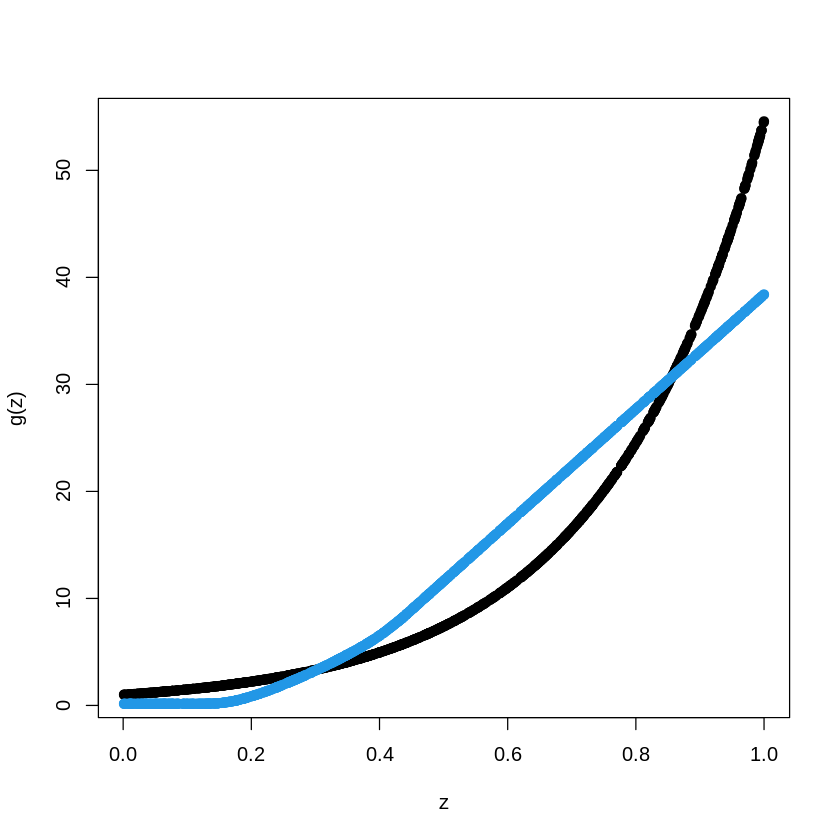

In [8]:
num_epochs <- 1
model %>% fit(X_train, Y_train,
                    epochs = num_epochs, batch_size = 10, verbose = 0)
pred.NN <- model %>% predict(X_train)
plot(X_train, Y_train, type="p", pch=19, xlab="z", ylab="g(z)")
points(X_train, pred.NN, col=4,  pch=19,)



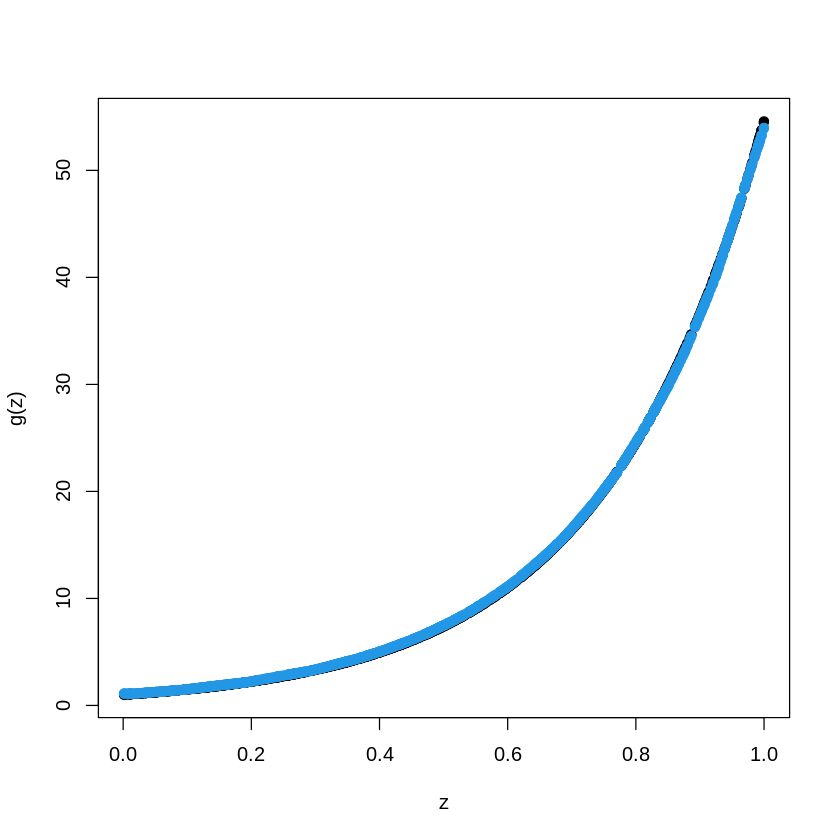

In [9]:
num_epochs <- 100
model %>% fit(X_train, Y_train,
                    epochs = num_epochs, batch_size = 10, verbose = 0)
pred.NN <- model %>% predict(X_train)
plot(X_train, Y_train, type="p", pch=19, xlab="z", ylab="g(z)")
points(X_train, pred.NN, col=4,  pch=19,)


